# Yike Li Homework 7


## 1. Crawl Yelp Website

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd


In [ ]:
websites=['https://www.yelp.com/biz/eleven-madison-park-new-york']
a='https://www.yelp.com/biz/eleven-madison-park-new-york'
page = urlopen(a)
soup = BeautifulSoup(page, 'html.parser')
pagenumber = soup.find('div',{'class':'page-of-pages arrange_unit arrange_unit--fill'}).get_text()
N=int(pagenumber[19:22])
i=1
while i<=N:
    page=str(20*i)
    newwebsite=(a+'?start='+page)
    websites.append(newwebsite)
    i+=1


In [ ]:
#loop all review pages
allReviews=[]
for url in websites:
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    #find_all————list     find————类似string 的html      

In [ ]:
#find all review related thing
    reviews = soup.find_all(itemprop='review')
    for review in reviews:
        comment = review.find(itemprop='description').get_text()
        data = review.find(itemprop='datePublished')['content']
        author = review.find(itemprop='author')['content']
        stars = review.find(itemprop='ratingValue')['content']
        allReviews.append([comment,data,author,stars])

In [ ]:
#transfer to dataframe and print
reviewsDF=pd.DataFrame(allReviews)
reviewsDF.columns=['comment','data','author','stars']


# save the outcome 
lykreviews=reviewsDF.to_csv('lykreviews1.csv')

### I choose 30 Michelin restaurants and keep crawling their comments using code before. Finally, I get 30 documents named from lykreviews1 to lykreviews30.
### Skip that process


## 1. Preprocessing 

In [1]:
import pandas as pd 
import gensim
from gensim import corpora,models
from gensim.models import LdaModel, LsiModel
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read all reviews
df1 = pd.read_csv('lykreviews1.csv')
df2 = pd.read_csv('lykreviews2.csv')
df3 = pd.read_csv('lykreviews3.csv')
df4 = pd.read_csv('lykreviews4.csv')
df5 = pd.read_csv('lykreviews5.csv')
df6 = pd.read_csv('lykreviews6.csv')
df7 = pd.read_csv('lykreviews7.csv')
df8 = pd.read_csv('lykreviews8.csv')
df9 = pd.read_csv('lykreviews9.csv')
df10 = pd.read_csv('lykreviews10.csv')
df11 = pd.read_csv('lykreviews11.csv')
df12 = pd.read_csv('lykreviews12.csv')
df13 = pd.read_csv('lykreviews13.csv')
df14 = pd.read_csv('lykreviews14.csv')
df15 = pd.read_csv('lykreviews15.csv')
df16 = pd.read_csv('lykreviews16.csv')
df17 = pd.read_csv('lykreviews17.csv')
df18 = pd.read_csv('lykreviews18.csv')
df19 = pd.read_csv('lykreviews19.csv')
df20 = pd.read_csv('lykreviews20.csv')
df21 = pd.read_csv('lykreviews21.csv')
df22 = pd.read_csv('lykreviews22.csv')
df23 = pd.read_csv('lykreviews23.csv')
df24 = pd.read_csv('lykreviews24.csv')
df25 = pd.read_csv('lykreviews25.csv')
df26 = pd.read_csv('lykreviews26.csv')
df27 = pd.read_csv('lykreviews27.csv')
df28 = pd.read_csv('lykreviews28.csv')
df29 = pd.read_csv('lykreviews29.csv')
df30 = pd.read_csv('lykreviews30.csv')


In [3]:
# concatenate all reviews and select columns
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30])
df.columns=['a','review','time','author','stars']
df=df.drop(['a'],axis=1)
df

,review,time,author,stars
0,tl;dr\n\nSeafood-heavy elegant tasting menu. L...,2019-04-09,Chris S.,5.0
1,I could write a long review ... talk about all...,2019-03-29,Benjamin K.,5.0
2,Went there for my 30's birthday. Everything is...,2019-03-16,Aili H.,4.0
3,"A truly memorable dining experience, simultane...",2019-02-16,Aaron J.,5.0
4,I wasn't sure I was in​ the right place initia...,2019-01-24,Brenda P.,5.0
5,What can you say about a Michelin *** star res...,2019-01-23,Ravi C.,4.0
6,Really enjoyed my trip to chef's table and I t...,2019-01-11,Radhika G.,5.0
7,"It was OK, but just OK.\n\nFor some reason I f...",2019-03-04,Kefei L.,3.0
8,"Been there 3x love this place, always amaizng!...",2019-04-07,Cici H.,5.0
9,"Located inside the Brookyln Fare Market, Chef'...",2019-02-02,Hanna K.,4.0


In [ ]:
 # 14147 one star    6529 two star  11796  three star

In [4]:
#convert all review text into list format
reviews = df['review'].tolist()
reviews

["tl;dr\n\nSeafood-heavy elegant tasting menu. Low on gimmicks, but entirely satisfying. I think it's better than Le Bernardin, and on par with EMP.\n\n----\n\nAt the time of this review, I have been to 3 three-stars in NYC as well as 4 two-stars in NYC -- Brooklyn Fare was a wonderful surprise.\n\n(for reference, our dinner was late March 2019)\n\nRESERVATIONS:\nI'm not sure if it's the move to Manhattan with more seats, but getting a reservation was not a big deal at all. You do have to call the reservation line on Monday morning to guarantee the best availability for the seats, but if you call when they open, you should get straight through to the receptionist. They book exactly 6 weeks in advance, and most likely you will be booking for the week that just opened, but they do have some sporadic spots in the intervening weeks, so plan ahead! I'm not sure why they haven't adopted Tock like all the other fine-dining restaurants, but I was happy that the reservation system was less of a

In [5]:
#remove '\n' and punctuations 
import string

new_reviews = []
for review in reviews: 
    for ch in review:
        if ch in string.punctuation:
            review = review.replace(ch,'') #replace punctuation with nothing
        if ch == '\n':
            review = review.replace(ch,' ') #replace \r with space
    new_reviews.append(review) 

new_reviews

['tldr  Seafoodheavy elegant tasting menu Low on gimmicks but entirely satisfying I think its better than Le Bernardin and on par with EMP    At the time of this review I have been to 3 threestars in NYC as well as 4 twostars in NYC  Brooklyn Fare was a wonderful surprise  for reference our dinner was late March 2019  RESERVATIONS Im not sure if its the move to Manhattan with more seats but getting a reservation was not a big deal at all You do have to call the reservation line on Monday morning to guarantee the best availability for the seats but if you call when they open you should get straight through to the receptionist They book exactly 6 weeks in advance and most likely you will be booking for the week that just opened but they do have some sporadic spots in the intervening weeks so plan ahead Im not sure why they havent adopted Tock like all the other finedining restaurants but I was happy that the reservation system was less of a headache than I expected  They will confirm wit

In [6]:
#remove stop words, to lowercase and tokenize
from nltk.corpus import stopwords
mystopwords = stopwords.words('english')

tokens_list = [[word for word in review.lower().split(' ') if word not in mystopwords and word.isalpha()]
         for review in new_reviews]

#remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)

for tokens in tokens_list:
    for token in tokens:
        frequency[token] += 1
        
tokens_list = [[token for token in tokens if frequency[token]>1]
              for tokens in tokens_list]

# print(tokens_list) 

## 2. Generate Term Document Matrix

In [7]:
# generate token dictionary class
dictionary = corpora.Dictionary(tokens_list) 
print(dictionary)

Dictionary(21372 unique tokens: ['actually', 'adopted', 'advance', 'ahead', 'almost']...)


In [8]:
# build a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]
# print(corpus) 

## 3. Topic modeling using LDA

In [75]:
#  0 Flavor of food    1 food variety   2 environment & service 
lda = models.LdaModel(corpus,id2word=dictionary, num_topics=3) #fit lda model

lda.print_topics(num_topics=3,num_words=7) # Topic matrix (V matrix)

[(0,
  '0.017*"good" + 0.011*"spicy" + 0.011*"ordered" + 0.009*"sauce" + 0.008*"food" + 0.008*"delicious" + 0.008*"really"'),
 (1,
  '0.010*"chili" + 0.008*"dish" + 0.007*"lamb" + 0.007*"chicken" + 0.006*"one" + 0.006*"blue" + 0.006*"flavor"'),
 (2,
  '0.015*"food" + 0.008*"place" + 0.008*"restaurant" + 0.007*"steak" + 0.007*"get" + 0.007*"service" + 0.006*"experience"')]

In [10]:
# Generate U Matrix for LDA model
#transform lda model
corpus_lda = lda[corpus] 

#convert corpus_lda to numpy matrix
U_matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=3).T

#write U_matrix into pandas dataframe and output
U_matrix_lda_df = pd.DataFrame(U_matrix_lda)
U_matrix_lda_df.to_csv('U_matrix_lda.csv')

In [76]:
U_matrix_lda_df.columns=['flavor','variety','environment']
U_matrix_lda_df.head()

,flavor,variety,environment
0,0.060530,0.388914,0.550556
1,0.013012,0.618175,0.368813
2,0.241977,0.697377,0.060646
3,0.080752,0.569185,0.350064
4,0.000000,0.284807,0.709522


In [77]:
# I generate a star and Michelin label file in EXCEL and merge it with document-topic matrix 
df31 = pd.read_csv('LABEL.csv')
df31.head()

,label
0,1
1,1
2,1
3,1
4,1


In [78]:
# concatenate the document-topic matrix and star+lebel 
df32= pd.concat([U_matrix_lda_df,df31],axis=1)
df32

,flavor,variety,environment,label
0,0.060530,0.388914,0.550556,1
1,0.013012,0.618175,0.368813,1
2,0.241977,0.697377,0.060646,1
3,0.080752,0.569185,0.350064,1
4,0.000000,0.284807,0.709522,1
5,0.000000,0.000000,0.989028,1
6,0.000000,0.277687,0.714290,1
7,0.363891,0.014512,0.621597,1
8,0.447518,0.028890,0.523591,1
9,0.012874,0.112590,0.874536,1


In [79]:
df33=df32[df32.label==1].mean()
df33

flavor         0.220777
variety        0.185690
environment    0.589767
label          1.000000
dtype: float64

In [80]:
df34=df32[df32.label==2].mean()
df34

flavor         0.156535
variety        0.205862
environment    0.634746
label          2.000000
dtype: float64

In [81]:
df35=df32[df32.label==3].mean()
df35

flavor         0.158074
variety        0.397720
environment    0.441774
label          3.000000
dtype: float64

In [82]:
df36= pd.concat([df33,df34,df35],axis=1)
df36.columns=['one_star','two_star','three_star']
df36=df36.drop(['label'])
df36

,one_star,two_star,three_star
flavor,0.220777,0.156535,0.158074
variety,0.185690,0.205862,0.397720
environment,0.589767,0.634746,0.441774


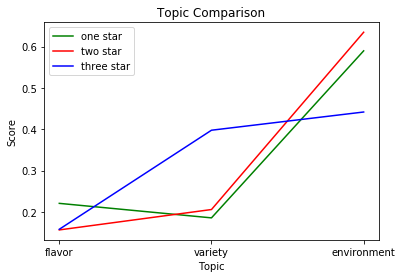

In [83]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Topic Comparison')
plt.plot(df36.one_star,color='green', label='one star')
plt.plot(df36.two_star, color='red', label='two star')
plt.plot(df36.three_star,  color='blue', label='three star')
plt.legend() 

plt.xlabel('Topic')
plt.ylabel('Score')
plt.show()


In [ ]:
## Customers in one-star, two-star and three-star restaurants are mainly talking about environment.

In [88]:
import sklearn
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(df32.iloc[:,0:3], df32.label, random_state=1,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators = 60,max_depth=3,class_weight="balanced").fit(data_train,y_train)

print("特征重要性:{}".format(rf.feature_importances_))

特征重要性:[0.31065427 0.40038749 0.28895823]


In [ ]:
##  It reveals that topic variety plays a more significant role in determining which level one restaurant is. 